# Introduction

### Libraries

In [1]:
# for scientific computing with Python
import pandas as pd
import numpy as np
import os as os


## Load Data

In [2]:
os.getcwd()
hofstedeDf = pd.read_csv('HofstedePatterns.csv', sep=',')
print(hofstedeDf.describe(include='all'))

covidDf = pd.read_csv('../DataAnalytics/Data/Covid_20200604.csv', sep=',')
print(covidDf.describe(include='all'))

Country    CovidName     PowerDx  Individuality  Masculinity  \
count            53           53   53.000000      53.000000    53.000000   
unique           53           53         NaN            NaN          NaN   
top     Philippines  Philippines         NaN            NaN          NaN   
freq              1            1         NaN            NaN          NaN   
mean            NaN          NaN   55.283019      44.528302    50.301887   
std             NaN          NaN   21.665621      25.537005    18.455336   
min             NaN          NaN   11.000000       6.000000     5.000000   
25%             NaN          NaN   36.000000      20.000000    42.000000   
50%             NaN          NaN   58.000000      41.000000    50.000000   
75%             NaN          NaN   68.000000      68.000000    64.000000   
max             NaN          NaN  104.000000      91.000000    95.000000   

               UAE  
count    53.000000  
unique         NaN  
top            NaN  
freq           

## Join

In [3]:
combinedDf = pd.concat([covidDf.set_index('Country'),hofstedeDf.set_index('Country')],axis=1, join='inner')
combinedDf.describe()

TotalCases   TotalDeaths   CasesPer1M  DeathsPer1M    TotalTests  \
count      48.000000     48.000000    48.000000    48.000000  4.800000e+01   
mean    66467.083333   4522.041667  1813.562500   117.672917  8.471007e+05   
std    105883.408014   8511.215097  1884.535971   182.458829  1.117800e+06   
min       443.000000      4.000000    19.000000     0.300000  1.361600e+04   
25%      6623.250000    136.000000   276.000000     6.750000  2.011710e+05   
50%     25079.500000    942.000000  1016.500000    38.000000  4.089725e+05   
75%     87373.000000   4680.250000  2749.750000   144.500000  9.463902e+05   
max    590485.000000  33689.000000  6315.000000   824.000000  4.348880e+06   

          TestsPer1M    Population     PowerDx  Individuality  Masculinity  \
count      48.000000  4.800000e+01   48.000000      48.000000    48.000000   
mean    30663.666667  7.356284e+07   55.833333      43.479167    49.979167   
std     28171.649600  2.015134e+08   21.979036      24.366868    19.099392   
min      1345.000000  2.960223e+06   11.000000       6.000000     5.000000   
25%      5861.000000  8.360530e+06   37.500000      20.000000    41.500000   
50%     21666.500000  2.145877e+07   58.000000      40.000000    50.000000   
75%     48522.750000  6.166682e+07   68.000000      67.250000    64.000000   
max    115971.000000  1.378974e+09  104.000000      90.000000    95.000000   

              UAE  
count   48.000000  
mean    66.708333  
std     24.676596  
min      8.000000  
25%     49.000000  
50%     70.000000  
75%     86.000000  
max    112.000000

In [4]:
ind = combinedDf['Individuality']
pdx = combinedDf['PowerDx']
masc = combinedDf['Masculinity']
uae = combinedDf['UAE']
per1M = combinedDf['CasesPer1M']
deathsPer1M = combinedDf['DeathsPer1M']
pop = combinedDf['Population']

## Scatter


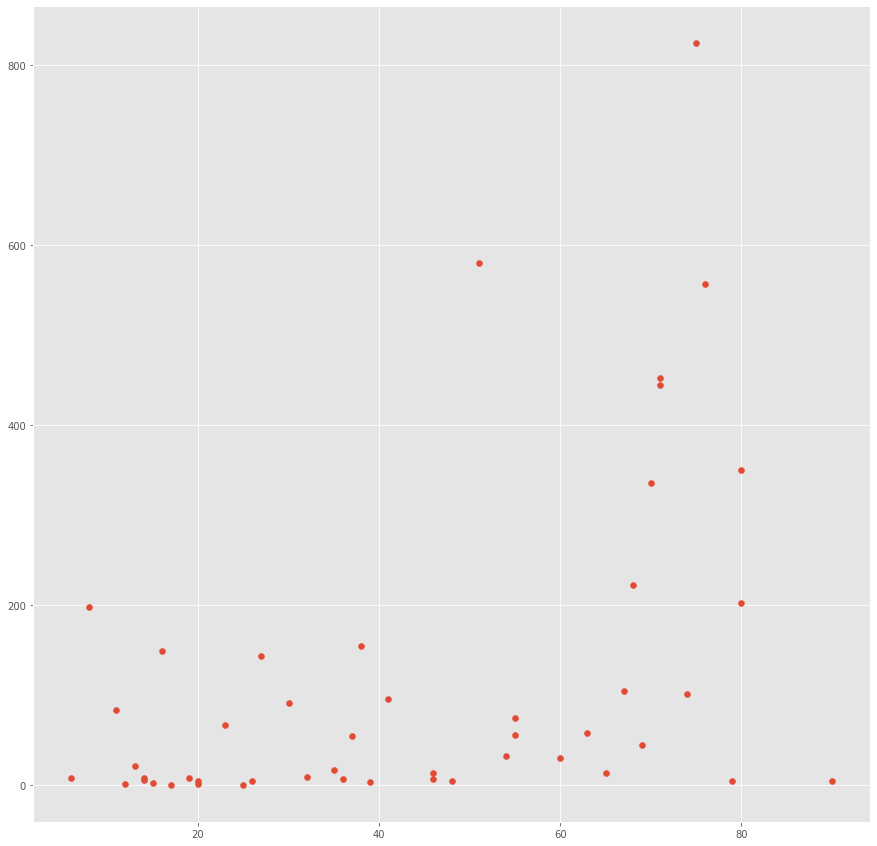

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
plt.figure(figsize=(15,15))
plt.scatter(ind, deathsPer1M)
plt.show()

## Correlation

In [6]:
np.corrcoef(ind, deathsPer1M)

array([[1.        , 0.45987644],
       [0.45987644, 1.        ]])

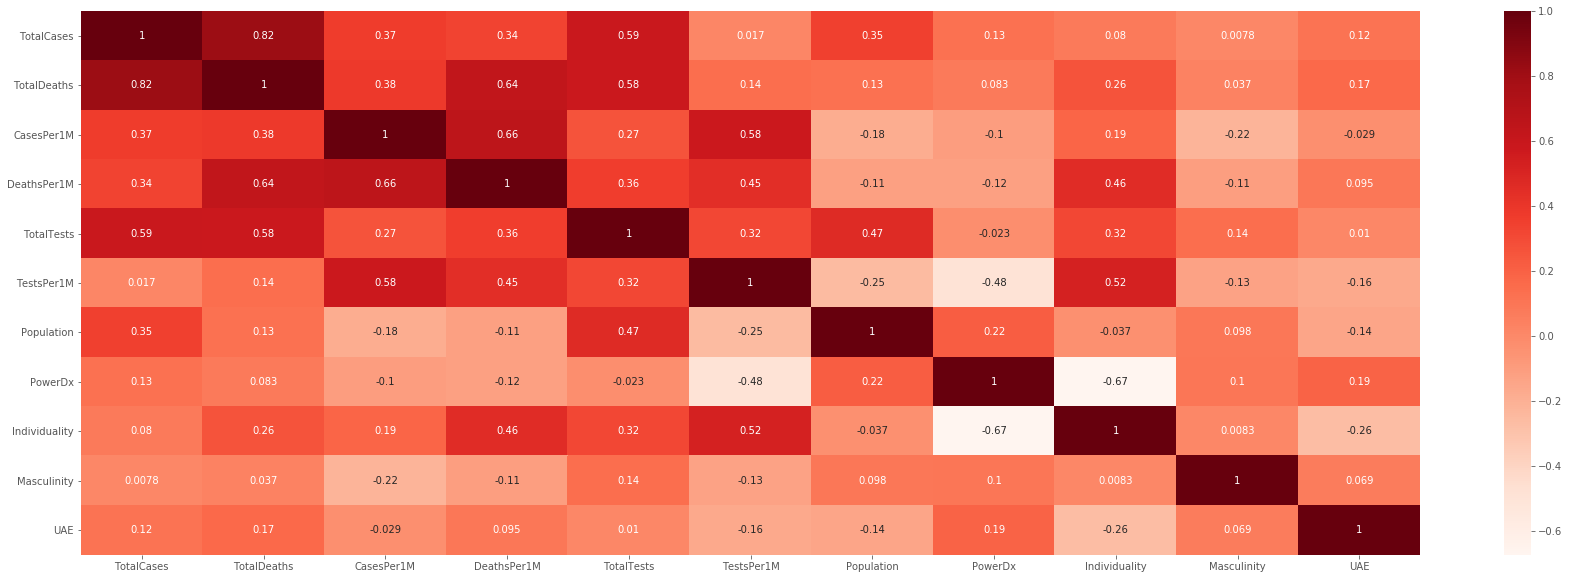

In [41]:
combinedCorr = combinedDf.corr()
plt.figure(figsize=(30,10))
sn.heatmap(combinedCorr, annot=True, cmap="Reds")
plt.show()


## Alternative Data (OECD)

In [7]:
oecdDf = pd.read_csv('../DataAnalytics/Data/OECD_QualityOfLife.csv', sep=',')
print(oecdDf.describe(include='all'))

Country  HofstederPowerDx  HofstederIndividuality  \
count        24         24.000000               24.000000   
unique       24               NaN                     NaN   
top     Denmark               NaN                     NaN   
freq          1               NaN                     NaN   
mean        NaN         40.750000               65.208333   
std         NaN         15.492635               18.897847   
min         NaN         11.000000               18.000000   
25%         NaN         31.000000               58.750000   
50%         NaN         37.000000               69.500000   
75%         NaN         54.750000               76.750000   
max         NaN         68.000000               91.000000   

        HofstederMasculinity  HofstederUncertaintyAvoidance  \
count              24.000000                      24.000000   
unique                   NaN                            NaN   
top                      NaN                            NaN   
freq                   

In [8]:
oecdCombinedDf = pd.concat([covidDf.set_index('Country'),oecdDf.set_index('Country')],axis=1, join='inner')
oecdCombinedDf.describe()

TotalCases   TotalDeaths   CasesPer1M  DeathsPer1M    TotalTests  \
count      21.000000     21.000000    21.000000    21.000000  2.100000e+01   
mean    60334.571429   6402.142857  2876.476190   225.190476  1.087748e+06   
std     83000.220086  10355.166128  1960.358656   231.618354  1.368872e+06   
min      1504.000000     10.000000   134.000000     4.000000  6.135500e+04   
25%      7240.000000    238.000000  1567.000000    44.000000  2.755000e+05   
50%     25111.000000   1455.000000  2484.000000   143.000000  4.094500e+05   
75%     58767.000000   7635.000000  4149.000000   350.000000  1.384633e+06   
max    287406.000000  33689.000000  6441.000000   824.000000  4.348880e+06   

          TestsPer1M    Population  HofstederPowerDx  HofstederIndividuality  \
count      21.000000  2.100000e+01         21.000000               21.000000   
mean    62036.285714  2.622324e+07         40.142857               65.095238   
std     41585.593354  3.301034e+07         15.982133               15.417214   
min      2374.000000  3.410790e+05         11.000000               27.000000   
25%     35270.000000  5.540104e+06         31.000000               60.000000   
50%     52370.000000  1.019877e+07         36.000000               69.000000   
75%     77705.000000  3.771722e+07         54.000000               75.000000   
max    179885.000000  1.265033e+08         68.000000               90.000000   

       HofstederMasculinity  ...  Theftfromcar  Motorcycletheft  Bicycletheft  \
count             21.000000  ...     16.000000        16.000000     16.000000   
mean              46.428571  ...      4.556250         0.437500      3.912500   
std               25.615564  ...      2.285598         0.396443      2.120338   
min                5.000000  ...      1.600000         0.000000      0.800000   
25%               26.000000  ...      2.875000         0.175000      2.225000   
50%               52.000000  ...      4.400000         0.300000      3.500000   
75%               66.000000  ...      5.825000         0.625000      5.325000   
max               95.000000  ...      9.600000         1.500000      7.200000   

       Assaultsandthreats  Sexualincidents  Burglaries  Robberies    PISAMath  \
count           16.000000         16.00000    16.00000  16.000000   21.000000   
mean             3.281250          2.29375     1.85625   0.931250  499.571429   
std              1.715505          1.01026     1.12722   0.667052   16.092145   
min              0.400000          0.60000     0.30000   0.100000  454.000000   
25%              2.325000          1.57500     1.07500   0.675000  492.000000   
50%              3.300000          2.25000     1.65000   0.850000  497.000000   
75%              4.200000          2.77500     2.32500   1.100000  511.000000   
max              6.400000          4.00000     4.30000   3.100000  532.000000   

       PISAScience  PISAReading  
count    21.000000     21.00000  
mean    500.857143    500.52381  
std      18.992856     15.41953  
min     455.000000    467.00000  
25%     493.000000    492.00000  
50%     502.000000    500.00000  
75%     509.000000    509.00000  
max     538.000000    527.00000  

[8 rows x 45 columns]

In [9]:
oecdCombinedDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Luxembourg to Japan
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TotalCases                     21 non-null     int64  
 1   TotalDeaths                    21 non-null     int64  
 2   CasesPer1M                     21 non-null     int64  
 3   DeathsPer1M                    21 non-null     float64
 4   TotalTests                     21 non-null     int64  
 5   TestsPer1M                     21 non-null     int64  
 6   Population                     21 non-null     int64  
 7   HofstederPowerDx               21 non-null     int64  
 8   HofstederIndividuality         21 non-null     int64  
 9   HofstederMasculinity           21 non-null     int64  
 10  HofstederUncertaintyAvoidance  21 non-null     int64  
 11  HofstederLongtermOrientation   21 non-null     int64  
 12  HofstederIndulgence            21 non-null   

In [10]:
ind2 = oecdCombinedDf['HofstederIndividuality']
pdx2 = oecdCombinedDf['HofstederPowerDx']
masc2 = oecdCombinedDf['HofstederMasculinity']
uae2 = oecdCombinedDf['HofstederUncertaintyAvoidance']
lto = oecdCombinedDf['HofstederLongtermOrientation']
indulgence = oecdCombinedDf['HofstederIndulgence']
per1M2 = oecdCombinedDf['CasesPer1M']
deathsPer1M2 = oecdCombinedDf['DeathsPer1M']
pop2 = oecdCombinedDf['Population']

In [11]:
oecdCombinedDf.corr()

ftfromcar                      0.359548    0.740260    0.323271   
Motorcycletheft                   0.332729    0.562143    0.089411   
Bicycletheft                     -0.167409   -0.571766   -0.347165   
Assaultsandthreats               -0.156097   -0.117898    0.024107   
Sexualincidents                  -0.412103   -0.164264   -0.047934   
Burglaries                       -0.089566    0.169002    0.404961   
Robberies                         0.548582    0.796555    0.429481   
PISAMath                         -0.008093   -0.075807   -0.222657   
PISAScience                      -0.146080   -0.022783   -0.385818   
PISAReading                      -0.073977    0.009086   -0.332741   

                               Population  HofstederPowerDx  \
TotalCases                       0.521363          0.411255   
TotalDeaths                      0.456456          0.515617   
CasesPer1M                      -0.244959          0.142889   
DeathsPer1M                      0.068129          0.474632   
TotalTests                       0.534113          0.269159   
TestsPer1M                      -0.412305         -0.204631   
Population                       1.000000          0.406373   
HofstederPowerDx                 0.406373          1.000000   
HofstederIndividuality          -0.084693         -0.379319   
HofstederMasculinity             0.507356          0.126494   
HofstederUncertaintyAvoidance    0.349514          0.801970   
HofstederLongtermOrientation     0.553139          0.304903   
HofstederIndulgence             -0.564953         -0.650156   
Patents                          0.847937          0.203263   
PatentsPerCapita                 0.716778          0.052563   
Diversity_Ethnic                -0.157694          0.107278   
Diversity_Linguistic            -0.167101          0.065722   
Diversity_Religious              0.358585         -0.177010   
ReligionMatters                 -0.010613          0.408338   
Protestantism                   -0.382467         -0.579858   
Religiosity                     -0.691611         -0.709234   
IQ                               0.433502         -0.180408   
Gini                            -0.101695          0.217429   
Employment                      -0.325994         -0.585865   
Unemployment                     0.389406          0.650354   
EduReading                       0.049761         -0.316748   
EduScience                       0.256251         -0.308022   
TertiaryEdu                      0.240517          0.082642   
LifeExpectancy                   0.530635          0.075216   
InfantDeath                     -0.294606         -0.042150   
Obesity                         -0.383309         -0.121270   
HoursWorked                      0.005295          0.135544   
Prison                          -0.097638          0.115901   
Carvandalism                     0.083325          0.215801   
Cartheft                         0.024000          0.070398   
Theftfromcar                     0.074019          0.301203   
Motorcycletheft                  0.578272          0.296612   
Bicycletheft                    -0.021202         -0.455414   
Assaultsandthreats              -0.383370         -0.302012   
Sexualincidents                 -0.417652         -0.758203   
Burglaries                      -0.136444         -0.225192   
Robberies                        0.060226          0.446375   
PISAMath                         0.325499         -0.237126   
PISAScience                      0.357632         -0.156248   
PISAReading                      0.220151         -0.181501   

                               HofstederIndividuality  HofstederMasculinity  \
TotalCases                                   0.051546              0.151544   
TotalDeaths                                  0.135959              0.107582   
CasesPer1M                                  -0.034501             -0.204967   
DeathsPer1M                                  0.214170             -0.039682   
TotalTes

In [12]:
np.corrcoef(ind2, deathsPer1M2)

array([[1.        , 0.21416979],
       [0.21416979, 1.        ]])

In [13]:
np.corrcoef(pdx2, deathsPer1M2)

array([[1.        , 0.47463197],
       [0.47463197, 1.        ]])

In [14]:

np.corrcoef(lto, deathsPer1M2)

array([[1.        , 0.35987699],
       [0.35987699, 1.        ]])

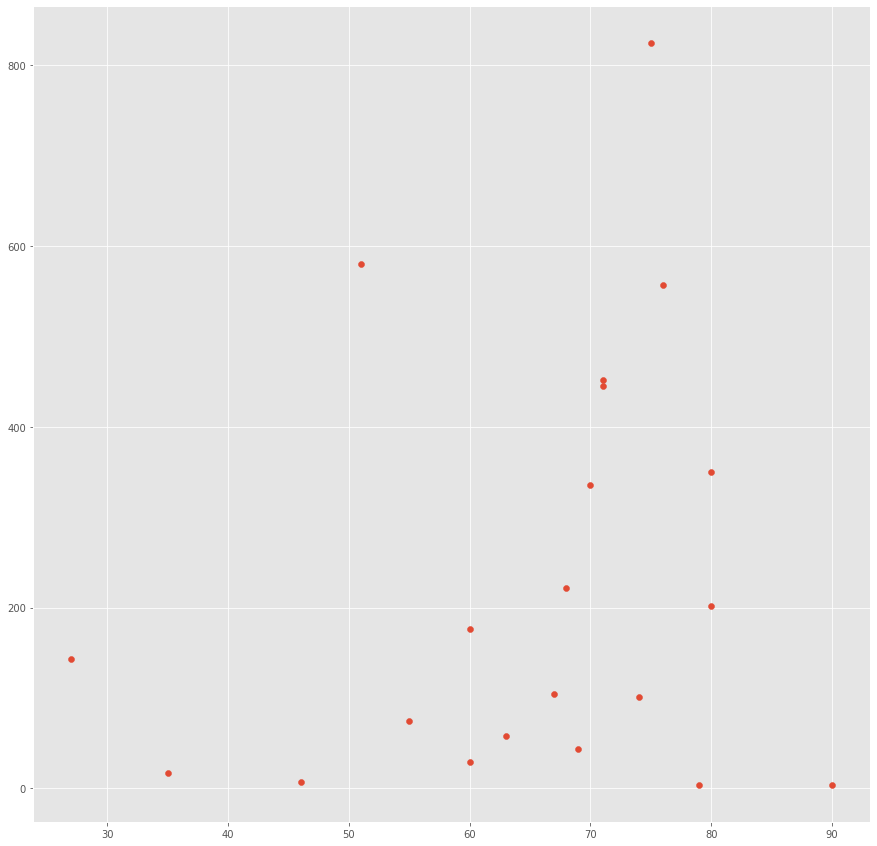

In [15]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
plt.figure(figsize=(15,15))
plt.scatter(ind2, deathsPer1M2)
plt.show()

In [16]:
trimmedDf = oecdCombinedDf.drop(oecdCombinedDf.iloc[:,18:44], axis=1, inplace=False)

In [17]:
trimmedDf.head()

TotalCases  TotalDeaths  CasesPer1M  DeathsPer1M  TotalTests  \
Country                                                                    
Luxembourg        4027          110        6441        176.0       82377   
Spain           287406        27128        6147        580.0     4063843   
Iceland           1806           10        5295         29.0       61355   
Ireland          25111         1659        5090        336.0      348416   
Belgium          58767         9548        5072        824.0      900282   

            TestsPer1M  Population  HofstederPowerDx  HofstederIndividuality  \
Country                                                                        
Luxembourg      131767      625170                40                      60   
Spain            86921    46753492                57                      51   
Iceland         179885      341079                30                      60   
Ireland          70622     4933560                28                      70   
Belgium          77705    11585939                65                      75   

            HofstederMasculinity  HofstederUncertaintyAvoidance  \
Country                                                           
Luxembourg                    50                             70   
Spain                         42                             86   
Iceland                       10                             50   
Ireland                       68                             35   
Belgium                       54                             94   

            HofstederLongtermOrientation  HofstederIndulgence  Patents  \
Country                                                                  
Luxembourg                            64                   56       62   
Spain                                 48                   44      912   
Iceland                               28                   67       59   
Ireland                               24                   65      515   
Belgium                               82                   57     1225   

            PatentsPerCapita  Diversity_Ethnic  Diversity_Linguistic  \
Country                                                                
Luxembourg                36              0.53                  0.64   
Spain                     67              0.42                  0.41   
Iceland                  197              0.08                  0.08   
Ireland                  193              0.12                  0.03   
Belgium                   50              0.56                  0.54   

            Diversity_Religious  PISAReading  
Country                                       
Luxembourg                 0.09          481  
Spain                      0.45          496  
Iceland                    0.19          482  
Ireland                    0.16          521  
Belgium                    0.21          499

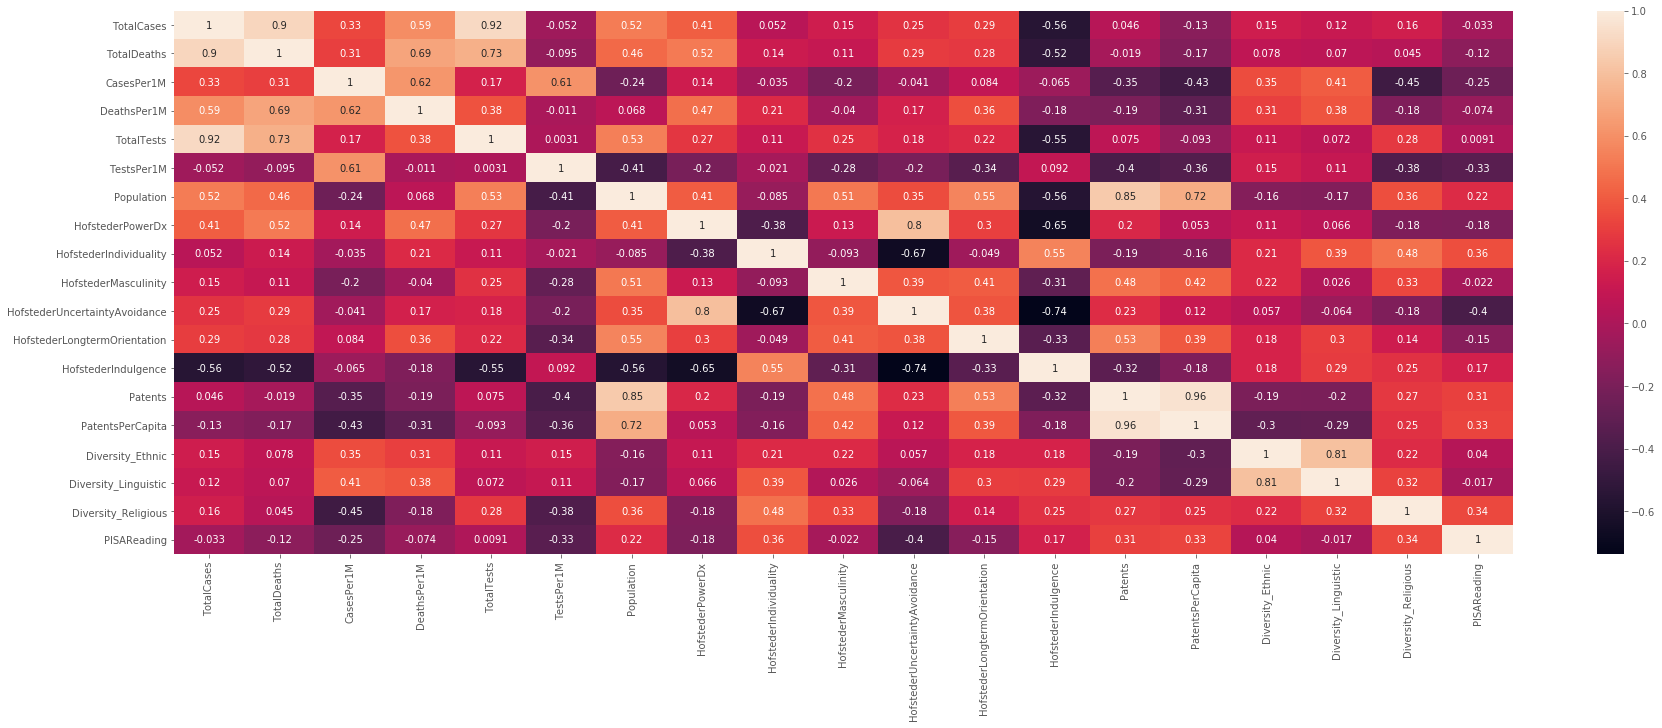

In [18]:
import seaborn as sn
corrMatrix = trimmedDf.corr()
plt.figure(figsize=(30,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [19]:
trimmedDf.corr()

TotalCases  TotalDeaths  CasesPer1M  \
TotalCases                       1.000000     0.902517    0.334136   
TotalDeaths                      0.902517     1.000000    0.305506   
CasesPer1M                       0.334136     0.305506    1.000000   
DeathsPer1M                      0.586219     0.687317    0.622410   
TotalTests                       0.918150     0.734128    0.173665   
TestsPer1M                      -0.051786    -0.094627    0.607271   
Population                       0.521363     0.456456   -0.244959   
HofstederPowerDx                 0.411255     0.515617    0.142889   
HofstederIndividuality           0.051546     0.135959   -0.034501   
HofstederMasculinity             0.151544     0.107582   -0.204967   
HofstederUncertaintyAvoidance    0.253628     0.292082   -0.041331   
HofstederLongtermOrientation     0.294289     0.276020    0.084013   
HofstederIndulgence             -0.557541    -0.516794   -0.065176   
Patents                          0.046419    -0.019468   -0.349450   
PatentsPerCapita                -0.133977    -0.168320   -0.434491   
Diversity_Ethnic                 0.151489     0.077927    0.352308   
Diversity_Linguistic             0.115069     0.069548    0.407573   
Diversity_Religious              0.155929     0.044730   -0.449690   
PISAReading                     -0.033262    -0.123924   -0.250407   

                               DeathsPer1M  TotalTests  TestsPer1M  \
TotalCases                        0.586219    0.918150   -0.051786   
TotalDeaths                       0.687317    0.734128   -0.094627   
CasesPer1M                        0.622410    0.173665    0.607271   
DeathsPer1M                       1.000000    0.375386   -0.011030   
TotalTests                        0.375386    1.000000    0.003141   
TestsPer1M                       -0.011030    0.003141    1.000000   
Population                        0.068129    0.534113   -0.412305   
HofstederPowerDx                  0.474632    0.269159   -0.204631   
HofstederIndividuality            0.214170    0.114831   -0.021114   
HofstederMasculinity             -0.039682    0.251803   -0.284661   
HofstederUncertaintyAvoidance     0.167829    0.184576   -0.202530   
HofstederLongtermOrientation      0.359877    0.216899   -0.339745   
HofstederIndulgence              -0.175971   -0.550349    0.092237   
Patents                          -0.194148    0.074940   -0.402185   
PatentsPerCapita                 -0.314718   -0.092544   -0.364145   
Diversity_Ethnic                  0.305191    0.113679    0.154991   
Diversity_Linguistic              0.377600    0.072195    0.107788   
Diversity_Religious              -0.176181    0.275454   -0.376203   
PISAReading                      -0.073977    0.009086   -0.332741   

                               Population  HofstederPowerDx  \
TotalCases                       0.521363          0.411255   
TotalDeaths                      0.456456          0.515617   
CasesPer1M                      -0.244959          0.142889   
DeathsPer1M                      0.068129          0.474632   
TotalTests                       0.534113          0.269159   
TestsPer1M                      -0.412305         -0.204631   
Population                       1.000000          0.406373   
HofstederPowerDx                 0.406373          1.000000   
HofstederIndividuality          -0.084693         -0.379319   
HofstederMasculinity             0.507356          0.126494   
HofstederUncertaintyAvoidance    0.349514          0.801970   
HofstederLongtermOrientation     0.553139          0.304903   
HofstederIndulgence             -0.564953         -0.650156   
Patents                          0.847937          0.203263   
PatentsPerCapita                 0.716778          0.052563   
Diversity_Ethnic                -0.157694          0.107278   
Diversity_Linguistic            -0.167101          0.065722   
Diversity_Religious              0.358585         -0.177010   
PISAReading                     

In [34]:
trimmedDf2 = oecdCombinedDf.drop(oecdCombinedDf.iloc[:,32:41], axis=1, inplace=False)

In [35]:
trimmedDf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Luxembourg to Japan
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TotalCases                     21 non-null     int64  
 1   TotalDeaths                    21 non-null     int64  
 2   CasesPer1M                     21 non-null     int64  
 3   DeathsPer1M                    21 non-null     float64
 4   TotalTests                     21 non-null     int64  
 5   TestsPer1M                     21 non-null     int64  
 6   Population                     21 non-null     int64  
 7   HofstederPowerDx               21 non-null     int64  
 8   HofstederIndividuality         21 non-null     int64  
 9   HofstederMasculinity           21 non-null     int64  
 10  HofstederUncertaintyAvoidance  21 non-null     int64  
 11  HofstederLongtermOrientation   21 non-null     int64  
 12  HofstederIndulgence            21 non-null   

In [36]:
trimmedDf2.drop(trimmedDf2.columns[[0,1,4,5,18,32]], axis=1, inplace=True)

In [37]:
trimmedDf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Luxembourg to Japan
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CasesPer1M                     21 non-null     int64  
 1   DeathsPer1M                    21 non-null     float64
 2   Population                     21 non-null     int64  
 3   HofstederPowerDx               21 non-null     int64  
 4   HofstederIndividuality         21 non-null     int64  
 5   HofstederMasculinity           21 non-null     int64  
 6   HofstederUncertaintyAvoidance  21 non-null     int64  
 7   HofstederLongtermOrientation   21 non-null     int64  
 8   HofstederIndulgence            21 non-null     int64  
 9   Patents                        21 non-null     int64  
 10  PatentsPerCapita               21 non-null     int64  
 11  Diversity_Ethnic               21 non-null     float64
 12  Diversity_Linguistic           21 non-null   

In [38]:
trimmedDf2.corr()

CasesPer1M  DeathsPer1M  Population  \
CasesPer1M                       1.000000     0.622410   -0.244959   
DeathsPer1M                      0.622410     1.000000    0.068129   
Population                      -0.244959     0.068129    1.000000   
HofstederPowerDx                 0.142889     0.474632    0.406373   
HofstederIndividuality          -0.034501     0.214170   -0.084693   
HofstederMasculinity            -0.204967    -0.039682    0.507356   
HofstederUncertaintyAvoidance   -0.041331     0.167829    0.349514   
HofstederLongtermOrientation     0.084013     0.359877    0.553139   
HofstederIndulgence             -0.065176    -0.175971   -0.564953   
Patents                         -0.349450    -0.194148    0.847937   
PatentsPerCapita                -0.434491    -0.314718    0.716778   
Diversity_Ethnic                 0.352308     0.305191   -0.157694   
Diversity_Linguistic             0.407573     0.377600   -0.167101   
Diversity_Religious             -0.449690    -0.176181    0.358585   
Protestantism                   -0.170112    -0.348348   -0.382467   
Religiosity                      0.652027     0.213857   -0.691611   
IQ                               0.063684     0.083659    0.433502   
Gini                            -0.029760    -0.014389   -0.101695   
Employment                      -0.097136    -0.447671   -0.325994   
Unemployment                     0.154433     0.497805    0.389406   
EduReading                      -0.401401    -0.083639    0.049761   
EduScience                      -0.461350    -0.154710    0.256251   
TertiaryEdu                     -0.151219     0.037426    0.240517   
LifeExpectancy                  -0.109075    -0.033526    0.530635   
InfantDeath                      0.058575     0.064316   -0.294606   
Obesity                          0.088977    -0.160895   -0.383309   
HoursWorked                     -0.119456    -0.296425    0.005295   
PISAMath                        -0.129312    -0.008093    0.325499   
PISAScience                     -0.359752    -0.146080    0.357632   
PISAReading                     -0.250407    -0.073977    0.220151   

                               HofstederPowerDx  HofstederIndividuality  \
CasesPer1M                             0.142889               -0.034501   
DeathsPer1M                            0.474632                0.214170   
Population                             0.406373               -0.084693   
HofstederPowerDx                       1.000000               -0.379319   
HofstederIndividuality                -0.379319                1.000000   
HofstederMasculinity                   0.126494               -0.092785   
HofstederUncertaintyAvoidance          0.801970               -0.669393   
HofstederLongtermOrientation           0.304903               -0.049041   
HofstederIndulgence                   -0.650156                0.550643   
Patents                                0.203263               -0.190928   
PatentsPerCapita                       0.052563               -0.161165   
Diversity_Ethnic                       0.107278                0.213804   
Diversity_Linguistic                   0.065722                0.387391   
Diversity_Religious                   -0.177010                0.483523   
Protestantism                         -0.579858                0.319483   
Religiosity                           -0.709234                0.712218   
IQ                                    -0.180408                0.226856   
Gini                                   0.217429               -0.095655   
Employment                            -0.585865                0.239931   
Unemployment                           0.650354               -0.284561   
EduReading                            -0.316748                0.483316   
EduScience                            -0.308022                0.408829   
TertiaryEdu                            0.082642                0.269458   
LifeExpectancy                         0.075216             

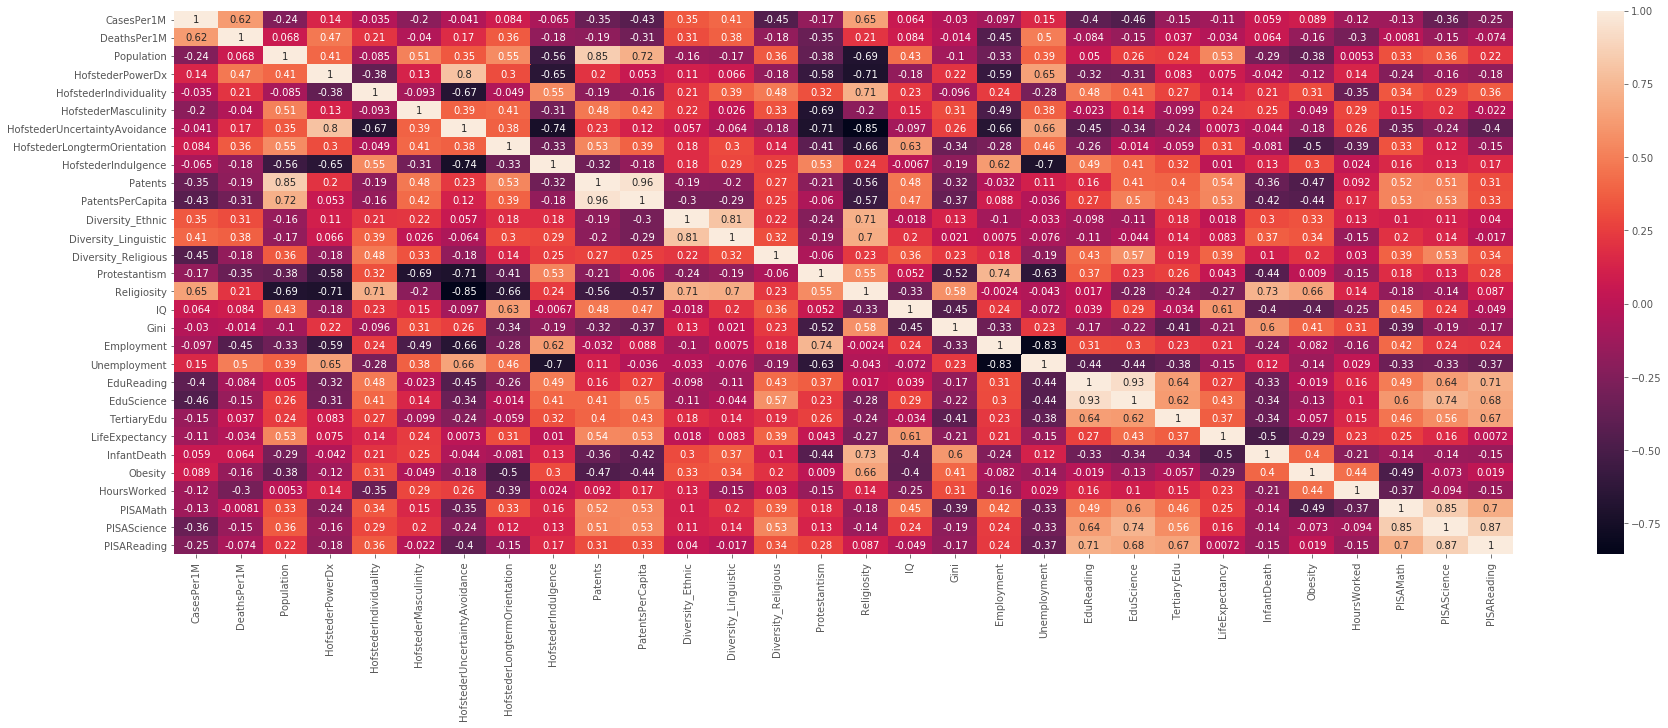

In [39]:
corrMatrix3 = trimmedDf2.corr()
plt.figure(figsize=(30,10))
sn.heatmap(corrMatrix3, annot=True)
plt.show()

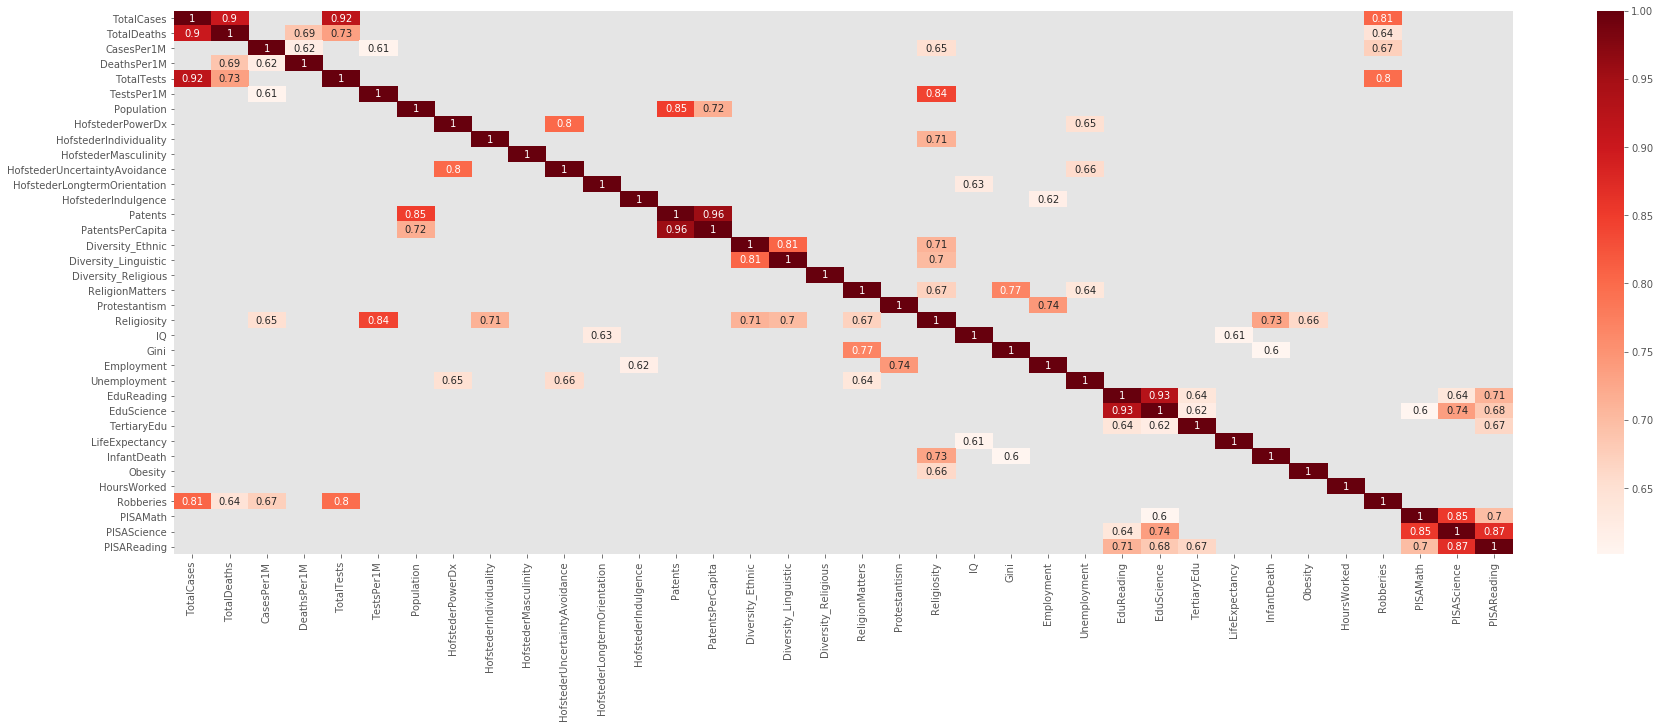

In [26]:
filteredCorrMatrix3 = corrMatrix3[corrMatrix3 >=.6]
plt.figure(figsize=(30,10))
sn.heatmap(filteredCorrMatrix3, annot=True, cmap="Reds")
plt.show()

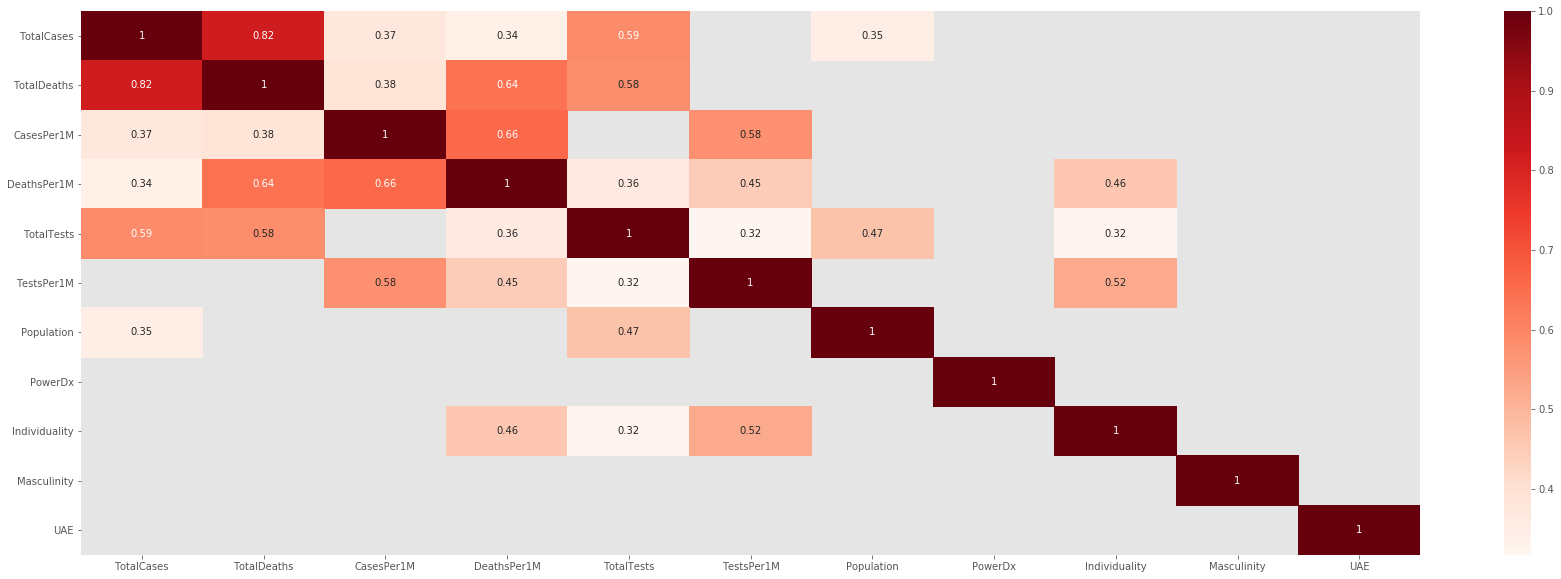

In [27]:
corrMatrix4 = combinedDf.corr()
filteredCorrMatrix4 = corrMatrix4[corrMatrix4 >=.3]
plt.figure(figsize=(30,10))
sn.heatmap(filteredCorrMatrix4, annot=True, cmap="Reds")
plt.show()

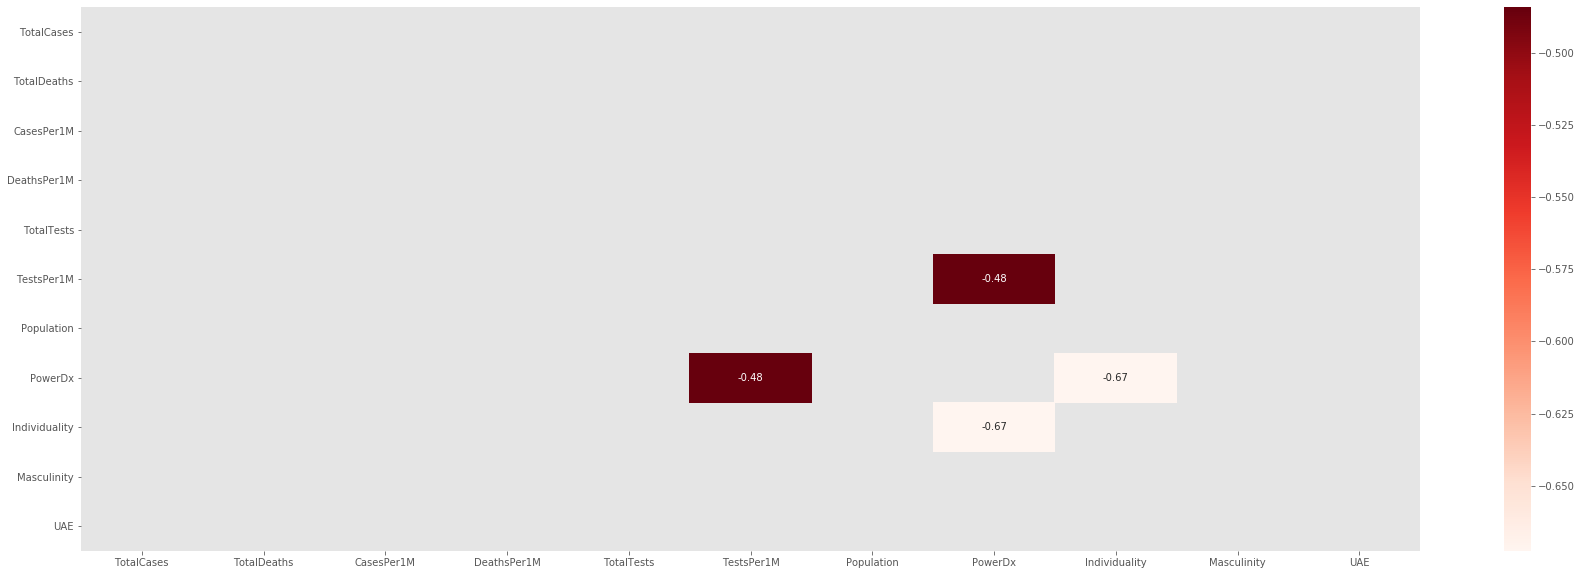

In [28]:
corrMatrix4 = combinedDf.corr()
filteredCorrMatrix4 = corrMatrix4[corrMatrix4 <=-.3]
plt.figure(figsize=(30,10))
sn.heatmap(filteredCorrMatrix4, annot=True, cmap="Reds")
plt.show()

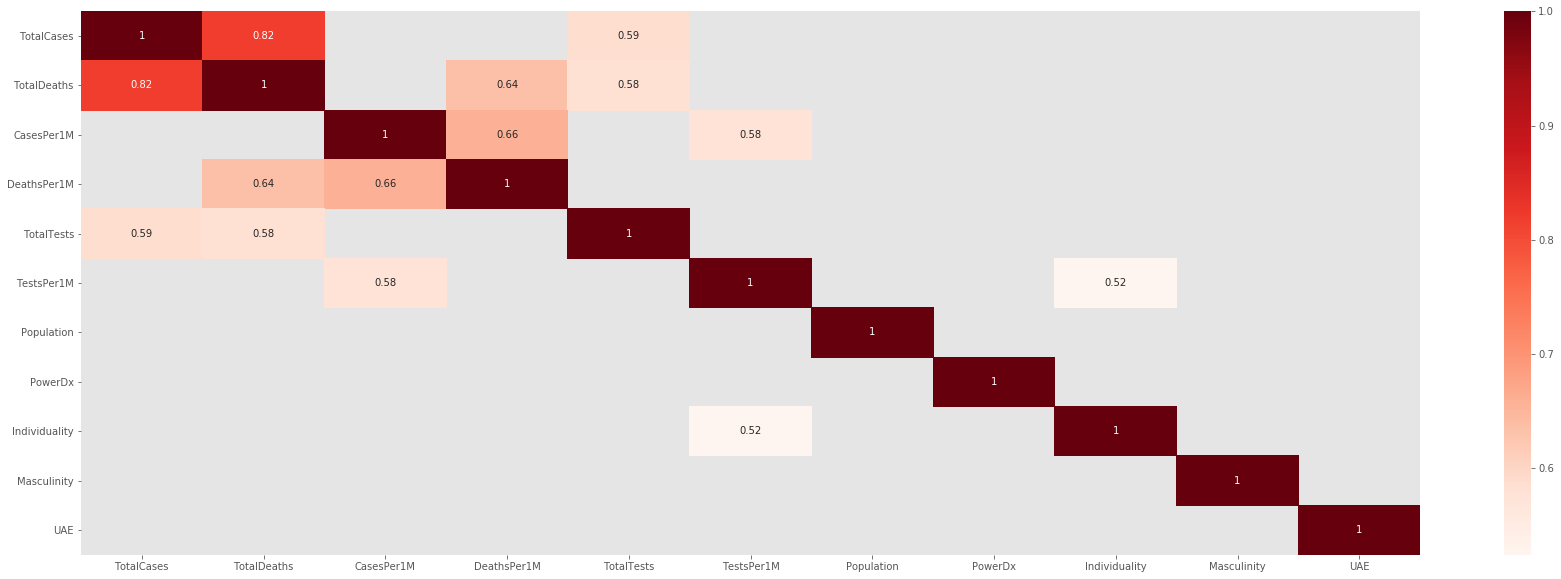

In [29]:
corrMatrix5 = combinedDf.corr()
part1 = corrMatrix5[corrMatrix5 >=.5]
part2 = corrMatrix5[corrMatrix5 <=-.5]

plt.figure(figsize=(30,10))
sn.heatmap(part1, annot=True, cmap="Reds")
plt.show()

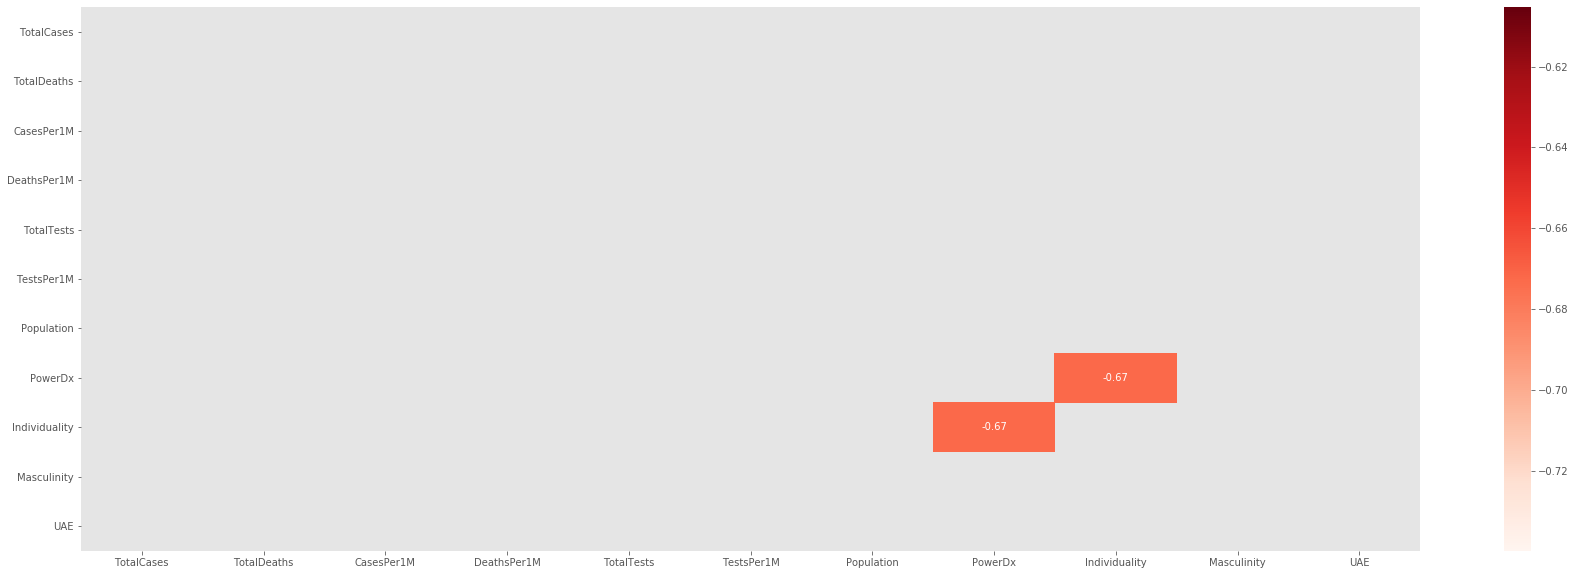

In [30]:
plt.figure(figsize=(30,10))
sn.heatmap(part2, annot=True, cmap="Reds")
plt.show()

## Just Hofstede and OECD Analysis

In [43]:
oecdCorr = oecdDf.corr()
oecdCorr

7360   
Diversity_Linguistic                               0.059514   
Diversity_Religious                                0.121852   
ReligionMatters                                   -0.062269   
Protestantism                                     -0.408500   
Religiosity                                       -0.702352   
IQ                                                 0.697164   
Gini                                              -0.351966   
Employment                                        -0.330767   
Unemployment                                       0.257787   
EduReading                                        -0.137153   
EduScience                                         0.157503   
TertiaryEdu                                        0.002432   
LifeExpectancy                                     0.121203   
InfantDeath                                       -0.193926   
Obesity                                           -0.560621   
HoursWorked                                        0.079106   
Prison                                            -0.338321   
Carvandalism                                      -0.126380   
Cartheft                                          -0.334575   
Theftfromcar                                      -0.430095   
Motorcycletheft                                    0.348504   
Bicycletheft                                       0.359550   
Assaultsandthreats                                -0.467606   
Sexualincidents                                   -0.285963   
Burglaries                                        -0.365046   
Robberies                                         -0.128949   
PISAMath                                           0.471209   
PISAScience                                        0.193943   
PISAReading                                       -0.005387   

                               HofstederIndulgence   Patents  \
HofstederPowerDx                         -0.673267  0.080841   
HofstederIndividuality                    0.670775  0.177151   
HofstederMasculinity                     -0.191322  0.272089   
HofstederUncertaintyAvoidance            -0.752436 -0.057137   
HofstederLongtermOrientation             -0.475222 -0.030914   
HofstederIndulgence                       1.000000  0.018648   
Patents                                   0.018648  1.000000   
PatentsPerCapita                         -0.348488  0.379613   
Diversity_Ethnic                          0.261784  0.177790   
Diversity_Linguistic                      0.340964  0.217522   
Diversity_Religious                       0.205199  0.409536   
ReligionMatters                          -0.519778  0.137202   
Protestantism                             0.536424  0.015778   
Religiosity                               0.558697  0.714732   
IQ                                       -0.181815  0.101453   
Gini                                     -0.053789  0.294664   
Employment                                0.630638  0.076291   
Unemployment                             -0.470152 -0.238468   
EduReading                                0.373317  0.059108   
EduScience                                0.215338  0.126320   
TertiaryEdu                               0.220864  0.293426   
LifeExpectancy                            0.104430 -0.120874   
InfantDeath                               0.236450  0.345127   
Obesity                                   0.448870  0.470142   
HoursWorked                              -0.253063  0.188853   
Prison                                    0.204374  0.876815   
Carvandalism                              0.035996  0.043744   
Cartheft                                 -0.013545 -0.281646   
Theftfromcar                             -0.060273  0.070786   
Motorcycletheft                          -0.549861  0.039556   
Bicycletheft                              0.447972 -0.081113   
Assaultsandthreats                        0.713945 -0.125595   
Sexualincidents                           0.567746 -

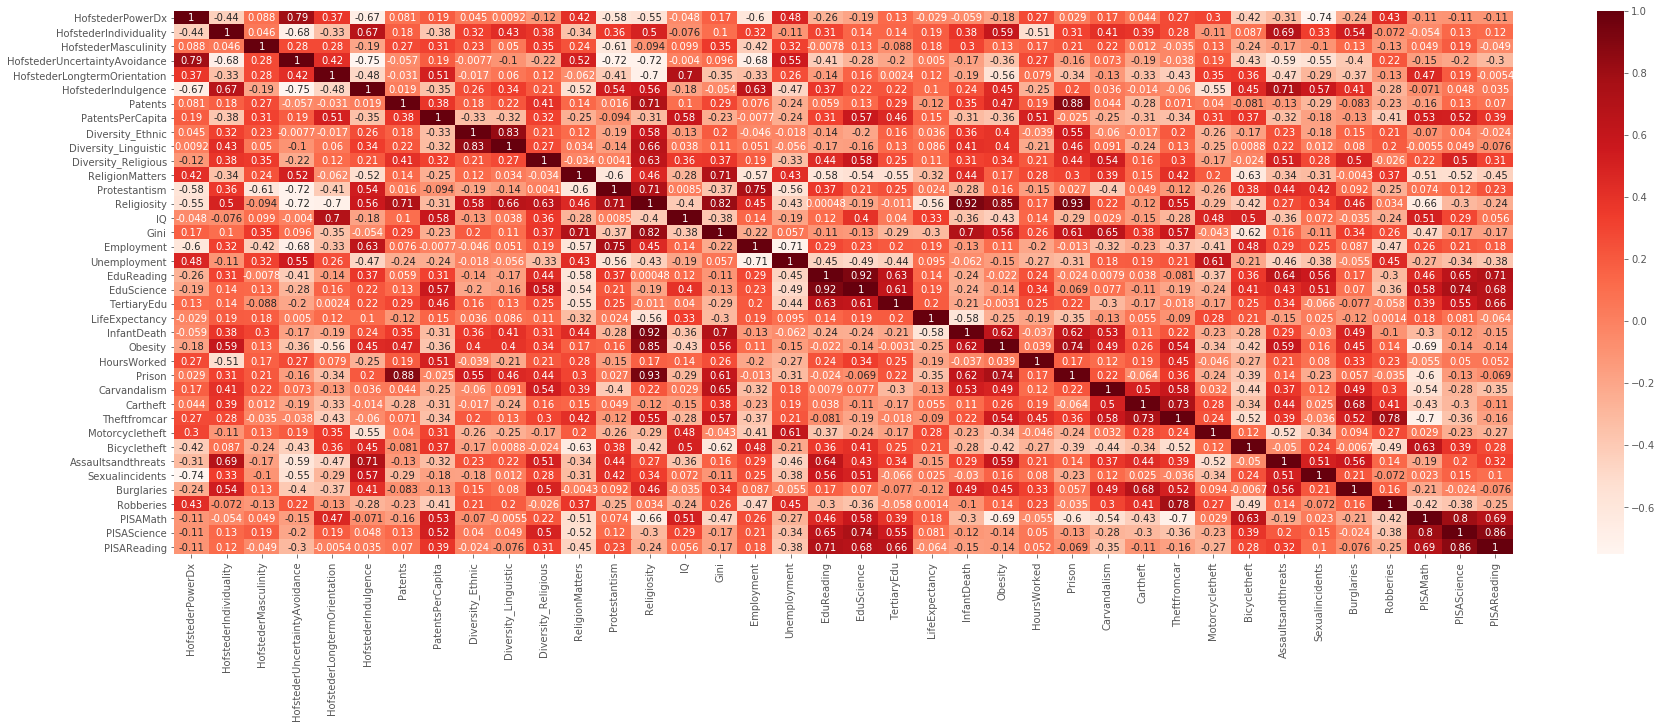

In [44]:
plt.figure(figsize=(30,10))
sn.heatmap(oecdCorr, annot=True, cmap="Reds")
plt.show()

In [45]:
oecdDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        24 non-null     object 
 1   HofstederPowerDx               24 non-null     int64  
 2   HofstederIndividuality         24 non-null     int64  
 3   HofstederMasculinity           24 non-null     int64  
 4   HofstederUncertaintyAvoidance  24 non-null     int64  
 5   HofstederLongtermOrientation   24 non-null     int64  
 6   HofstederIndulgence            24 non-null     int64  
 7   Patents                        24 non-null     int64  
 8   PatentsPerCapita               24 non-null     int64  
 9   Diversity_Ethnic               24 non-null     float64
 10  Diversity_Linguistic           24 non-null     float64
 11  Diversity_Religious            24 non-null     float64
 12  ReligionMatters                22 non-null     float

In [50]:
oecdTrimmed = oecdDf.drop(oecdDf.iloc[:,26:35], axis=1, inplace=False)
oecdTrimmed

Country  HofstederPowerDx  HofstederIndividuality  \
0        Australia                36                      90   
1          Austria                11                      55   
2          Belgium                65                      75   
3           Canada                39                      80   
4          Denmark                18                      74   
5          Finland                33                      63   
6           France                68                      71   
7          Germany                35                      67   
8           Greece                60                      35   
9          Iceland                30                      60   
10         Ireland                28                      70   
11           Italy                50                      76   
12           Japan                54                      46   
13           Korea                60                      18   
14      Luxembourg                40                      60   
15     Netherlands                38                      80   
16     New Zealand                22                      79   
17          Norway                31                      69   
18        Portugal                63                      27   
19           Spain                57                      51   
20          Sweden                31                      71   
21     Switzerland                34                      68   
22  United Kingdom                35                      89   
23   United States                40                      91   

    HofstederMasculinity  HofstederUncertaintyAvoidance  \
0                     61                             51   
1                     79                             70   
2                     54                             94   
3                     52                             48   
4                     16                             23   
5                     26                             59   
6                     43                             86   
7                     66                             65   
8                     57                            112   
9                     10                             50   
10                    68                             35   
11                    70                             75   
12                    95                             92   
13                    39                             85   
14                    50                             70   
15                    14                             53   
16                    58                             49   
17                     8                             50   
18                    31                            104   
19                    42                             86   
20                     5                             29   
21                    70                             58   
22                    66                             35   
23                    62                             46   

    HofstederLongtermOrientation  HofstederIndulgence  Patents  \
0                             21                   71     1917   
1                             60                   63     1262   
2                             82                   57     1225   
3                             36                   68     7492   
4                             35                   70     1190   
5                             38                   57     1485   
6                             63                   48     7026   
7                             83                   40    17752   
8                             45                   50       77   
9                             28                   67       59   
10                            24                   65      515   
11                            61                   30     3090   
12                            88                   42    54422   
13        

In [51]:
oecdTrimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        24 non-null     object 
 1   HofstederPowerDx               24 non-null     int64  
 2   HofstederIndividuality         24 non-null     int64  
 3   HofstederMasculinity           24 non-null     int64  
 4   HofstederUncertaintyAvoidance  24 non-null     int64  
 5   HofstederLongtermOrientation   24 non-null     int64  
 6   HofstederIndulgence            24 non-null     int64  
 7   Patents                        24 non-null     int64  
 8   PatentsPerCapita               24 non-null     int64  
 9   Diversity_Ethnic               24 non-null     float64
 10  Diversity_Linguistic           24 non-null     float64
 11  Diversity_Religious            24 non-null     float64
 12  ReligionMatters                22 non-null     float

In [52]:
oecdTrimmed.corr()

35521                1.000000   
HofstederMasculinity                   0.088137                0.045608   
HofstederUncertaintyAvoidance          0.790395               -0.682719   
HofstederLongtermOrientation           0.372949               -0.334953   
HofstederIndulgence                   -0.673267                0.670775   
Patents                                0.080841                0.177151   
PatentsPerCapita                       0.190435               -0.377769   
Diversity_Ethnic                       0.044673                0.316373   
Diversity_Linguistic                   0.009189                0.426780   
Diversity_Religious                   -0.117361                0.377968   
ReligionMatters                        0.418070               -0.341894   
Protestantism                         -0.580308                0.357430   
Religiosity                           -0.550277                0.500241   
IQ                                    -0.047918               -0.075845   
Gini                                   0.170735                0.102566   
Employment                            -0.598470                0.318629   
Unemployment                           0.476890               -0.105392   
EduReading                            -0.261834                0.307424   
EduScience                            -0.189502                0.143005   
TertiaryEdu                            0.128103                0.139207   
LifeExpectancy                        -0.029169                0.189316   
InfantDeath                           -0.058758                0.380149   
Obesity                               -0.179367                0.590268   
HoursWorked                            0.274769               -0.514801   
Robberies                              0.431361               -0.071658   
PISAMath                              -0.112419               -0.054079   
PISAScience                           -0.108684                0.131678   
PISAReading                           -0.106203                0.123114   

                               HofstederMasculinity  \
HofstederPowerDx                           0.088137   
HofstederIndividuality                     0.045608   
HofstederMasculinity                       1.000000   
HofstederUncertaintyAvoidance              0.280134   
HofstederLongtermOrientation               0.281216   
HofstederIndulgence                       -0.191322   
Patents                                    0.272089   
PatentsPerCapita                           0.308781   
Diversity_Ethnic                           0.232950   
Diversity_Linguistic                       0.049714   
Diversity_Religious                        0.354408   
ReligionMatters                            0.236375   
Protestantism                             -0.606479   
Religiosity                               -0.093740   
IQ                                         0.099428   
Gini                                       0.354125   
Employment                                -0.423639   
Unemployment                               0.315667   
EduReading                                -0.007790   
EduScience                                 0.132635   
TertiaryEdu                               -0.087995   
LifeExpectancy                             0.181183   
InfantDeath                                0.303088   
Obesity                                    0.133109   
HoursWorked                                0.165627   
Robberies                                 -0.128815   
PISAMath                                   0.049385   
PISAScience                                0.186240   
PISAReading                               -0.049138   

                               HofstederUncertaintyAvoidance  \
HofstederPowerDx                                    0.790395   
HofstederIndividuality                             -0.682719   
HofstederMasculinity                                0.280134   
HofstederUncertaintyAvoidance     

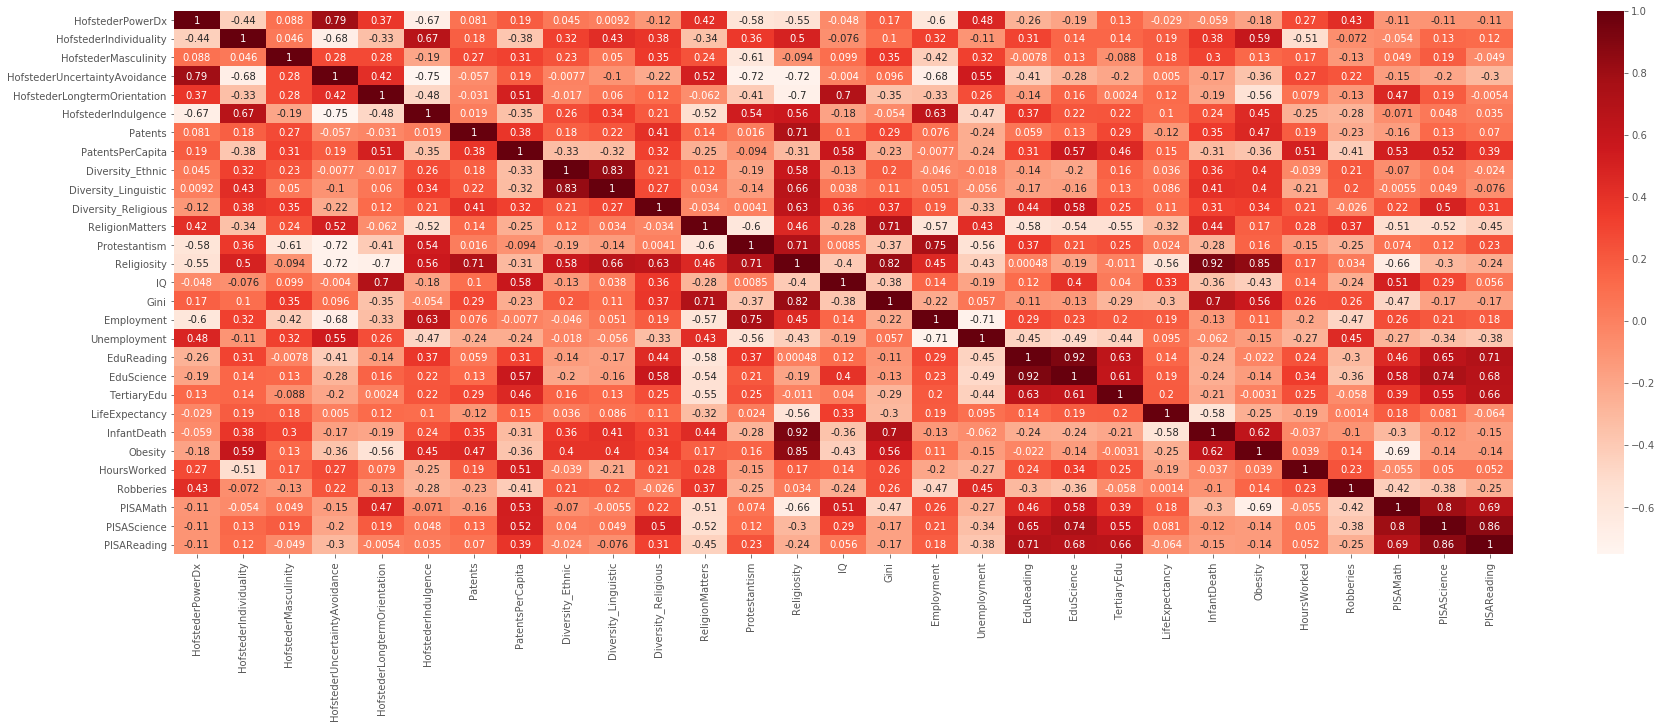

In [54]:
plt.figure(figsize=(30,10))
sn.heatmap(oecdTrimmed.corr(), annot=True, cmap="Reds")
plt.show()

In [63]:
oecdCorr = oecdTrimmed.corr()
filterDf = oecdCorr[(oecdCorr >= .5) | (oecdCorr <= -.5)]
filterDf


NaN                1.000000   
HofstederMasculinity                        NaN                     NaN   
HofstederUncertaintyAvoidance          0.790395               -0.682719   
HofstederLongtermOrientation                NaN                     NaN   
HofstederIndulgence                   -0.673267                0.670775   
Patents                                     NaN                     NaN   
PatentsPerCapita                            NaN                     NaN   
Diversity_Ethnic                            NaN                     NaN   
Diversity_Linguistic                        NaN                     NaN   
Diversity_Religious                         NaN                     NaN   
ReligionMatters                             NaN                     NaN   
Protestantism                         -0.580308                     NaN   
Religiosity                           -0.550277                0.500241   
IQ                                          NaN                     NaN   
Gini                                        NaN                     NaN   
Employment                            -0.598470                     NaN   
Unemployment                                NaN                     NaN   
EduReading                                  NaN                     NaN   
EduScience                                  NaN                     NaN   
TertiaryEdu                                 NaN                     NaN   
LifeExpectancy                              NaN                     NaN   
InfantDeath                                 NaN                     NaN   
Obesity                                     NaN                0.590268   
HoursWorked                                 NaN               -0.514801   
Robberies                                   NaN                     NaN   
PISAMath                                    NaN                     NaN   
PISAScience                                 NaN                     NaN   
PISAReading                                 NaN                     NaN   

                               HofstederMasculinity  \
HofstederPowerDx                                NaN   
HofstederIndividuality                          NaN   
HofstederMasculinity                       1.000000   
HofstederUncertaintyAvoidance                   NaN   
HofstederLongtermOrientation                    NaN   
HofstederIndulgence                             NaN   
Patents                                         NaN   
PatentsPerCapita                                NaN   
Diversity_Ethnic                                NaN   
Diversity_Linguistic                            NaN   
Diversity_Religious                             NaN   
ReligionMatters                                 NaN   
Protestantism                             -0.606479   
Religiosity                                     NaN   
IQ                                              NaN   
Gini                                            NaN   
Employment                                      NaN   
Unemployment                                    NaN   
EduReading                                      NaN   
EduScience                                      NaN   
TertiaryEdu                                     NaN   
LifeExpectancy                                  NaN   
InfantDeath                                     NaN   
Obesity                                         NaN   
HoursWorked                                     NaN   
Robberies                                       NaN   
PISAMath                                        NaN   
PISAScience                                     NaN   
PISAReading                                     NaN   

                               HofstederUncertaintyAvoidance  \
HofstederPowerDx                                    0.790395   
HofstederIndividuality                             -0.682719   
HofstederMasculinity                                     NaN   
HofstederUncertaintyAvoidance       

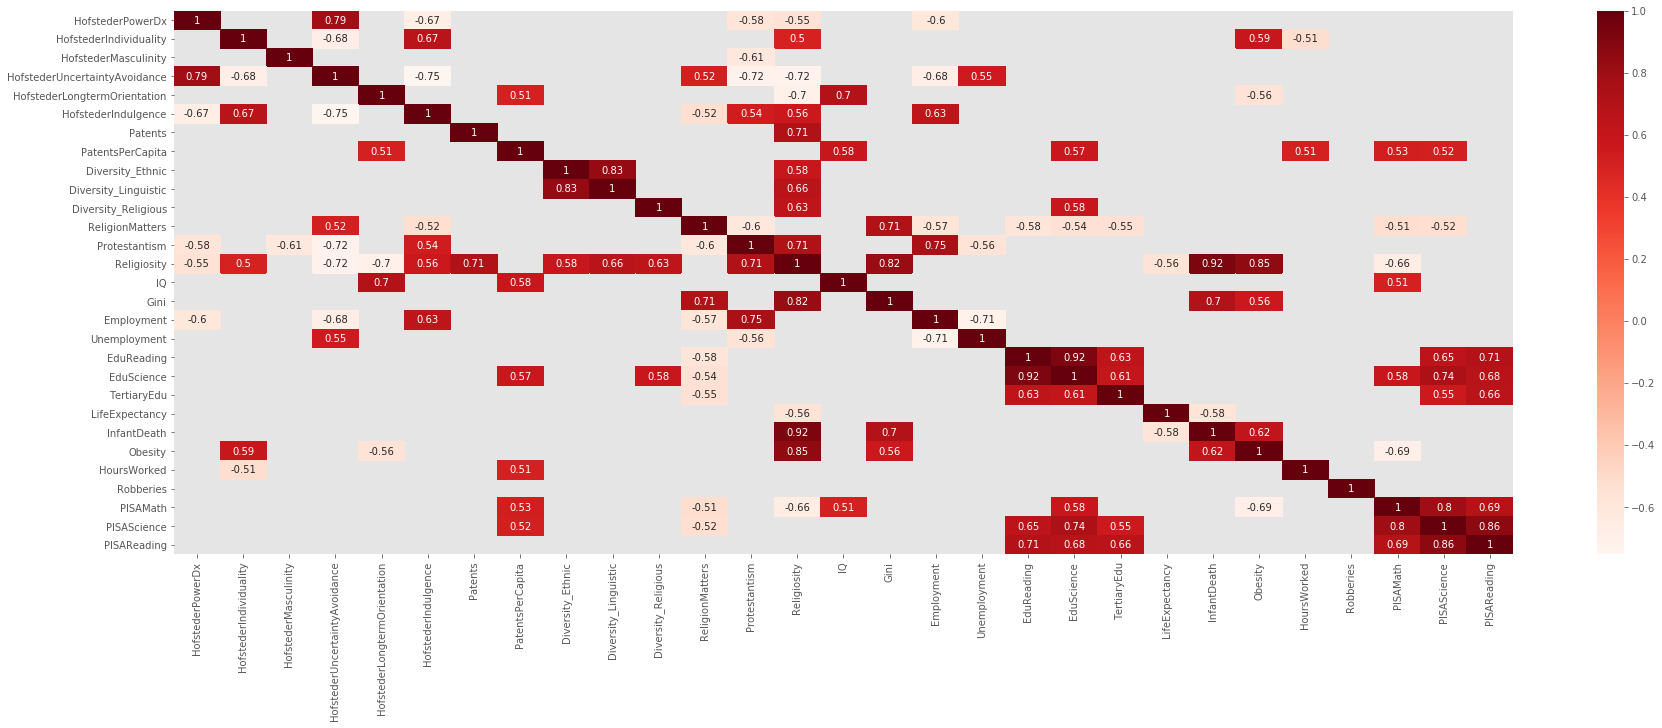

In [64]:
plt.figure(figsize=(30,10))
sn.heatmap(filterDf, annot=True, cmap="Reds")
plt.show()